In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [335]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [336]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
#training dataset
y = data['label']
x = data.drop(['label'],axis=1)
x_test = data_test.values
type(x_test)

numpy.ndarray

In [338]:
type(x_test)

numpy.ndarray

In [339]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [340]:
#data scailing
#x_train = x / 255
#x_test = x_test / 255
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#scale = MinMaxScaler()
#x_train = scale.fit_transform(x)
#x_test = scale.transform(x_test)

In [341]:
#x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [342]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [343]:
#Change y categories into binary using one hot encoding
y_train1 = utils.to_categorical(y_train, 10)
y_val1 = utils.to_categorical(y_val, 10)

In [344]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [348]:
x_train1 = x_train.values.reshape(-1,28,28,1)
x_val1 = x_val.values.reshape(-1,28,28,1)

In [349]:
x_train1.shape, x_val1.shape, y_train.shape, y_val.shape

((29400, 28, 28, 1), (12600, 28, 28, 1), (29400,), (12600,))

In [350]:
x_test1 = x_test.reshape(-1,28,28,1)
x_test1.shape

(28000, 28, 28, 1)

In [351]:
y_val1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

KeyError: 1

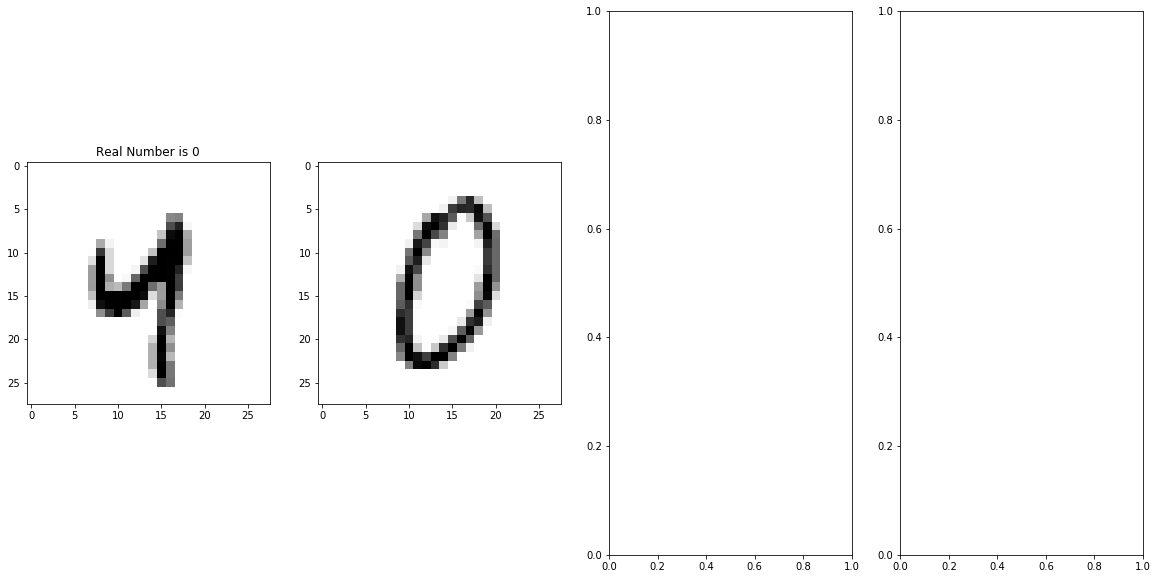

In [352]:
x_train__ = x_train1.reshape(x_train1.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

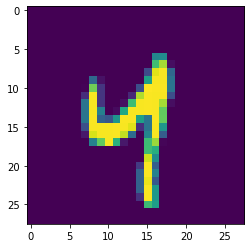

In [353]:
plt.imshow(x_train__[0])

In [354]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'Same',  activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=["accuracy"])

In [355]:
from tensorflow.keras.callbacks import EarlyStopping

In [356]:
early_stop = EarlyStopping(monitor='val_loss', patience= 5)

In [357]:
model.fit(x_train1, y_train1, epochs=30, batch_size=64,validation_data=(x_val1, y_val1), callbacks=[early_stop])

Epoch 1/30
460/460 [==============================] - 15s 33ms/step - loss: 0.2794 - accuracy: 0.9126 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 2/30
460/460 [==============================] - 16s 34ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.0524 - val_accuracy: 0.9836
Epoch 3/30
460/460 [==============================] - 16s 36ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 4/30
460/460 [==============================] - 16s 35ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 5/30
460/460 [==============================] - 16s 35ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 6/30
460/460 [==============================] - 16s 36ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0378 - val_accuracy: 0.9878
Epoch 7/30
460/460 [==============================] - 17s 37ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0350 - val_accuracy:

In [358]:
losses = pd.DataFrame(model.history.history)

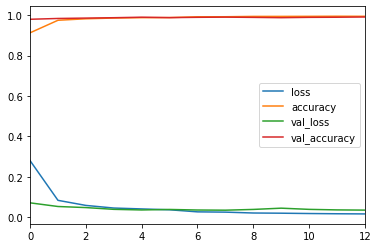

In [359]:
losses.plot()

In [360]:
pred = model.predict_classes(x_test1)

In [361]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [333]:
x_test1[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [363]:
result = pd.Series(pred,name='Label')

In [364]:
a = range(1,28001)
submission= pd.DataFrame({
    'ImageId': a,
    'Label': result
})
#submission.set_index('ImageId',inplace=True)
submission.to_csv('submission_cnn.csv',index=False)